# Цели и задачи


Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и необходимо спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [2]:
# Импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

### Открытие файла и изучение информации

In [3]:
# Открытие файла /datasets/games.csv и сохранение её в переменную data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')
    
# Вывод таблицы
display(data.sample)

# Вывод информации о типах данных в таблицах  
data.info()

data.describe()

<bound method NDFrame.sample of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Предобработка данных

In [4]:
# вывод количества пропущенных значений
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В шести столбцах есть пропущенные значения:
* Name (название игры). В данной таблице не получится заменить пропущенные значения, поэтому от них придется избавиться. Причиной по которой, название по играм осталось пустым может быть связано с человеческим фактором, либо отсутствием названия у игры. 
* Year_of_Release (дата выхода). Также не получится заменить пропуски, поэтому от них также придется избавиться. Причинами пропусков в данной таблице могут быть либо отсутствие данных о выходе игры, либо человеским фактором 
* Столбец Genre так же сложно подвести к какому-либо значению, так как необходимо знать жанр той или иной игры, поэтому от данных проппусков проще избавиться. Пропуски в данном столбце могли возникнуть из-за того, что при заполнении данных, либо забыли указать жанр игры, либо не определились к какому жанру она относится.
* Столбцы Critic_Score и User_Score (Оценки критиков и оценки пользователей) можно заменить медианным значением. Пустые значения могут быть связаны, либо с отсутствием оценок, то есть игры остались незамеченными, либо с их недавним выходом из-за чего ещё не были оценены. 
* Пропуски в столбце Rating не стоит удалять, так как из-за этого можно потерять большое количество данных, поэтому данный столбец останеться не изменным. Пропуски в данном столбце могли возникнуть из-за того, что при заполнении данных об игре, либо забыли указать рейтинг, либо не определились к какому рейтингу относится видеоигра.

Выведем количество уникальных значений для каждых столбцов и посмотрим, есть ли в таблицах повторяющиеся значения 

In [5]:
# Вывод уникальных значений  для таблицы Critic_Score
print(data.Critic_Score.unique(), '\n')

# Вывод уникальных значений  для таблицы Year_of_Release
print(data.Year_of_Release.unique(), '\n')

# Вывод уникальных значений  для таблицы User_Score
print(data.User_Score.unique(), '\n')

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.] 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5'

In [6]:
# Вывод уникальных значений для таблицы Genre
print(data['Genre'].value_counts(), '\n')

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64 



In [7]:
# Вывод уникальных значений для таблицы Platform
print(data['Platform'].value_counts(), '\n')

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64 



In [8]:
# Вывод уникальных значений для таблицы Rating
print(data['Rating'].value_counts(), '\n')

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64 



**Вывод:** 
1) Необходимо привести все столбцы к нижнему регистру.

2) Обработать пропуски в таблицах

3) Изменить тип данных в таблицах Critic_Score, Year_of_Release.

4) Заменить в таблице User_Score tbd на nan и привести к значению float.

5) Заменить в таблице Rating, устаревшее значения K-A, EC на E, так это один и тот же рейтинг.

In [9]:
# Приведение к нижнему регистру всех столбцов 
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
# Удаление пропусков в таблицах year_of_release, name, genre
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

In [11]:
# Произведем замену tdb на nan в таблице user_score
data['user_score'] = data['user_score'].replace('tbd', np.nan)
print(data.user_score.unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Изменим типы данных в таблицах year_of_release, critic_score

In [12]:
# Приводим таблицы user_score и year_of_release в формат float 
data['user_score'] = data['user_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype(int)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Произведем замену K-A, на E, а также значения EC на E10 в таблице rating
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('EC', 'E10')
# Произведем замены пустых значений на no_rating
data['rating'] = data['rating'].replace(np.nan, 'no_rating')
data.rating.unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'AO', 'E10', 'RP'],
      dtype=object)

Проверим еще раз количество пропущенных значений 

In [14]:
# вывод количества пропущенных значений
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [15]:
# Суммарный расчет продаж по всем регионам
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


**Вывод:** 
* Перед началом проведения анализа, все столбцы приведены к правильным типам данных и к нижнему регистру.
* Произведены замены K-A, на E, а также значения EC на E10 в таблице rating
* Также определено, что аббревиатура tbd означает to be determined, to be done. То есть данные были специально заполнены этой аббревиатурой, поэтому она была заменина на nan для проведения дальнейшего анализа
* После всех предобработок создана таблица для суммарного расчета прдаж по всем регионам  

### Исследование данных

Определим количество выпускаемых игр за разные периоды времени

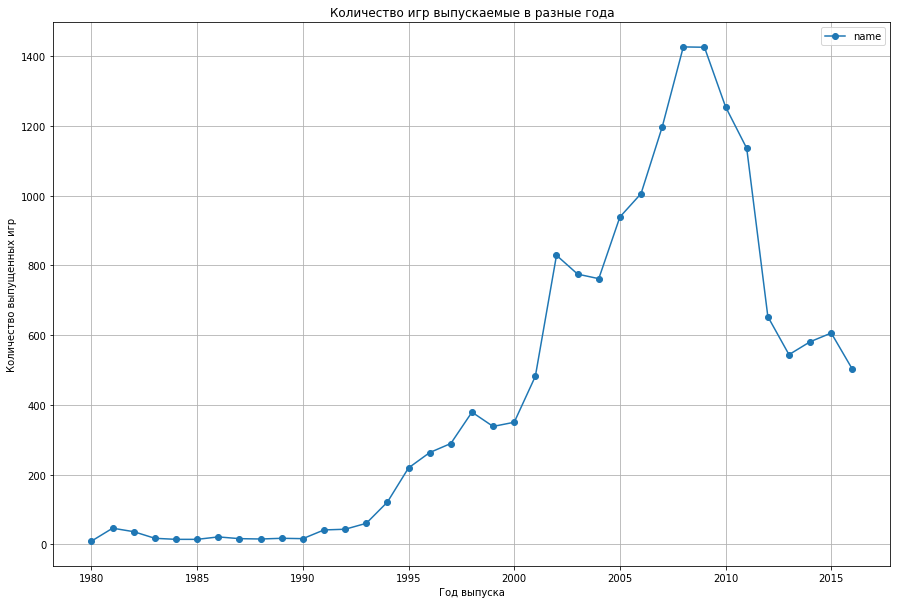

In [16]:
# Создаем график для игр, выходивших в разные года.
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, style='o-', 
          xlabel='Год выпуска',
          ylabel='Количество выпущенных игр',
          title='Количество игр выпускаемые в разные года',
          figsize=(15,10))
);


Как видно на графике, резкий рост по количествам игр начачал расти с 1991 по 2008 год, после этого началось их падение, связанная с выходом первого сенсерного телефона, из-за чего начал расти мобильный гейменг

Теперь выявим, как менялись продажи по платформам и какие из них лидируют по продажам.

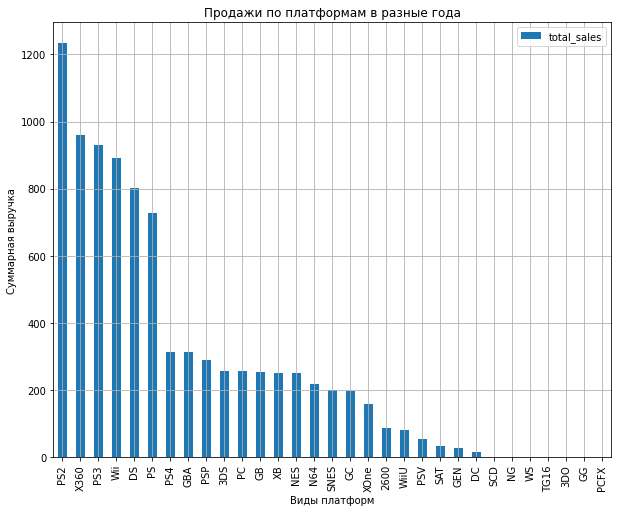

In [17]:
# Построение графика продаж по плотформам
( 
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(grid=True,
          kind='bar',
          xlabel='Виды платформ',
          ylabel='Суммарная выручка',
          title='Продажи по платформам в разные года',
          figsize=(10,8))
);

По графику видно, что самые популярные платформы за всё время это PS2, X360, PS3, WII, DS, PS

Проверим за какой срок появляются новые и исчезают старые платформы

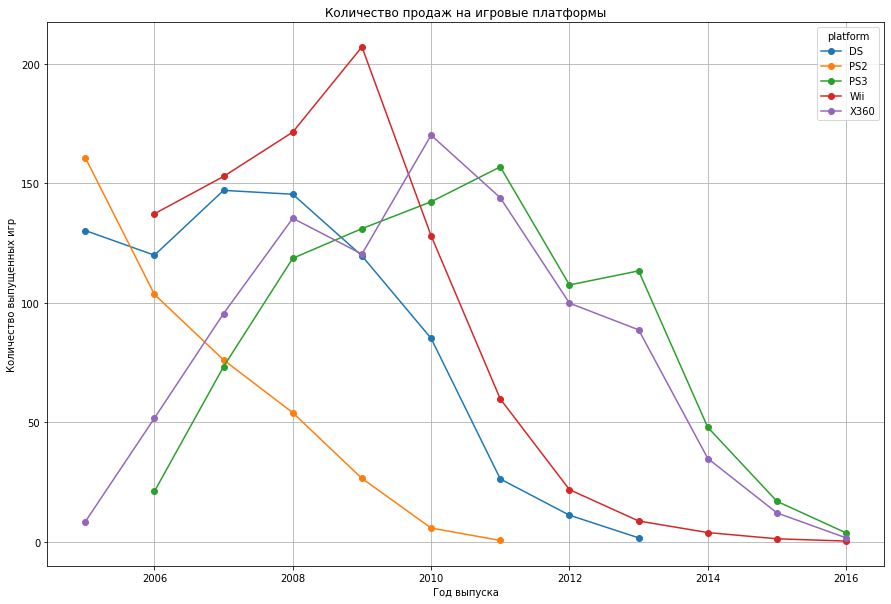

In [18]:
# вывод пяти популярных платформ и динамика их роста, либо спада с 2016 года
platforms_year = data.query("platform==['PS2', 'X360', 'PS3', 'Wii', 'DS'] and year_of_release > 2004")

# Построение графика продаж на игровых платформах за разные промежутки времени 
(
   platforms_year.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, style='o-',
          xlabel='Год выпуска',
          ylabel='Количество выпущенных игр',
          title='Количество продаж на игровые платформы',
          figsize=(15,10))
);

**Выводы**
* В средним большая часть платформ примерно существует 10 лет;
* Наибольшие суммарные продажи имеют XBOX и PS
* Самый пик у большинства платформ наступает примерно через 4-5 лет после выхода консоли
* Wii был быстрый скачок и быстрый провал после 2009 года


Для дальнейшего прогноза выделим года, по которым будет оптимально анализировать динамику продаж. Возмем данные за 2015 и 2016 года.

In [19]:
# Создадим датасет с актуальными годами
data_actual = data.query('2015 <= year_of_release <= 2016') 

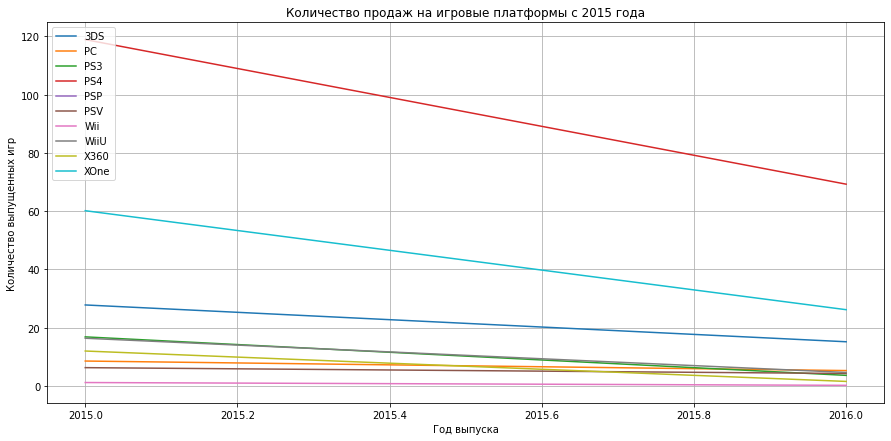

In [20]:
# Оставим только нужные года и построи диаграмму
( 
    data_actual.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='total_sales', 
                 aggfunc='sum')
    .plot(grid=True,
          xlabel='Год выпуска',
          ylabel='Количество выпущенных игр',
          title='Количество продаж на игровые платформы с 2015 года',
          figsize=(15, 7))
)
plt.legend(loc='upper left')
plt.show()

**Вывод:** На графике можно заметить, что продажи в течении года уменьшаются. Более менее хорошие показатели имеют PS4, Xbox One и 3DS. По остальным же платформам показатель близится к 0.
Далее выведем таблицу с подсчетом общих продаж.

In [21]:
# Создаем top_platforms, по таблицам platform и total_sales
top_platforms = data[['platform', 'total_sales']]

# Выбираем только нужные нам платформы
top_platforms = top_platforms.query("platform==['PS4', 'XOne', '3DS']")

In [22]:
top_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


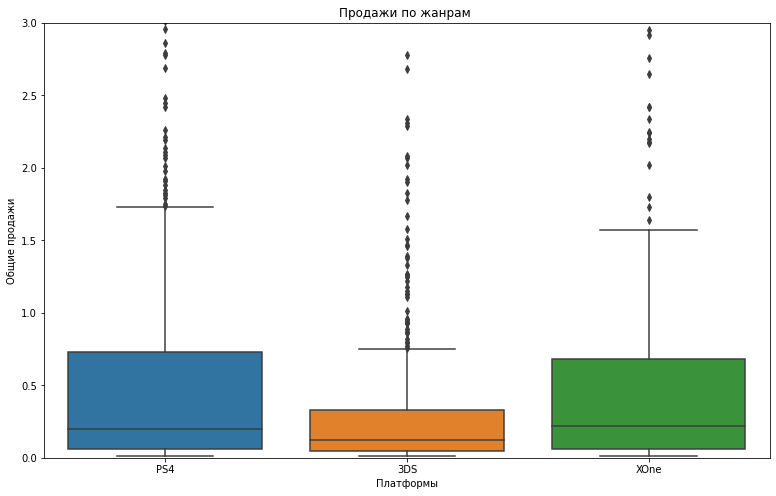

In [23]:

plt.figure(figsize=(13, 8))
(
    sns.boxplot(data = top_platforms, y = 'total_sales', x='platform')
    .set(title = 'Продажи по жанрам ',  xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3))
)

plt.show()

**Выводы**
* Просмотрев общую диаграмму размаха можно заметить частые выбросы и редкие значения. Данные выбросы стоит учесть так как есть игры, которые могли "стрельнуть" большими продажами.
* Медианны каждых платформ имеют различные значения. Так PS4 и XOne имеют одинаковое количество продаж, а 3DS имеет наименьший показатель.

Выявим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, для этого построим диаграмму рассеивания и посчитаем коэффициент корреляции

In [24]:
# Расчет корреляции отзывов пользователей и продаж на ps_2
ps_2 = data[data['platform']=='PS2']
print('Корреляция отзывов пользователей и продаж равна:', ps_2['user_score'].corr(ps_2['total_sales']), '\n')

# Расчет корреляции отзывов критиков и продаж на ps_2
ps_2 = data[data['platform']=='PS2']
print('Корреляция отзывов критиков и продаж равна:', ps_2['critic_score'].corr(ps_2['total_sales']))

Корреляция отзывов пользователей и продаж равна: 0.1750550277038374 

Корреляция отзывов критиков и продаж равна: 0.39253647544509007


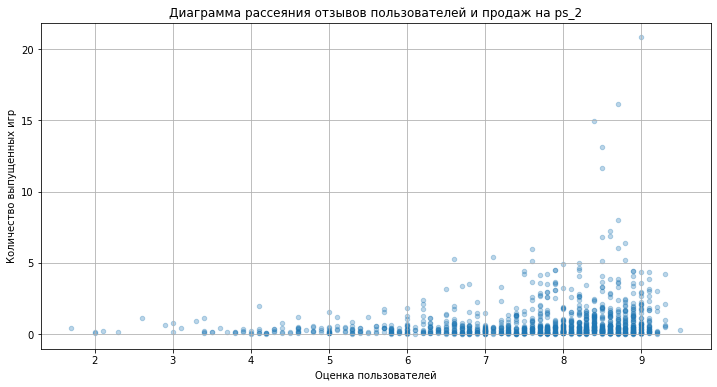

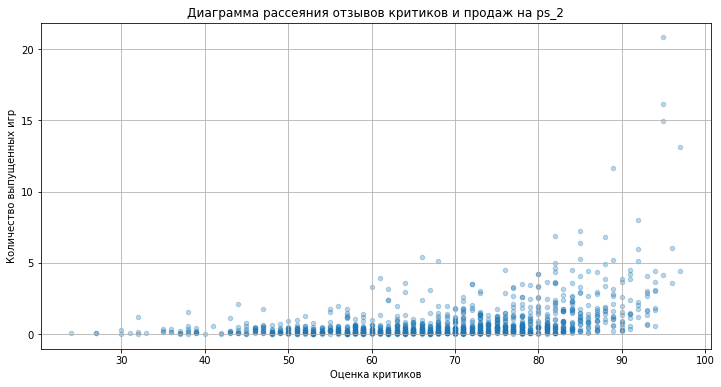

In [25]:
# Диаграмма рассеяния отзывов пользователей и продаж на ps_2
ps_2.plot(x='user_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка пользователей',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов пользователей и продаж на ps_2',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

# Диаграмма рассеяния отзывов критиков и продаж на ps_2
ps_2.plot(x='critic_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка критиков',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов критиков и продаж на ps_2',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

In [26]:
# Расчет корреляции отзывов пользователей и продаж на xbox
xbox = data[data['platform']=='X360']
print('Корреляция отзывов пользователей и продаж равна:', xbox['user_score'].corr(xbox['total_sales']), '\n')

# Расчет корреляции отзывов критиков и продаж на xbox
xbox = data[data['platform']=='X360']
print('Корреляция отзывов критиков и продаж равна:', xbox['critic_score'].corr(xbox['total_sales']))

Корреляция отзывов пользователей и продаж равна: 0.11418661214018049 

Корреляция отзывов критиков и продаж равна: 0.39286589254006954


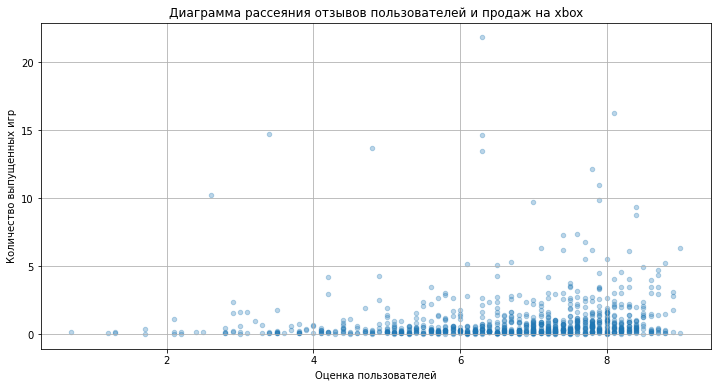

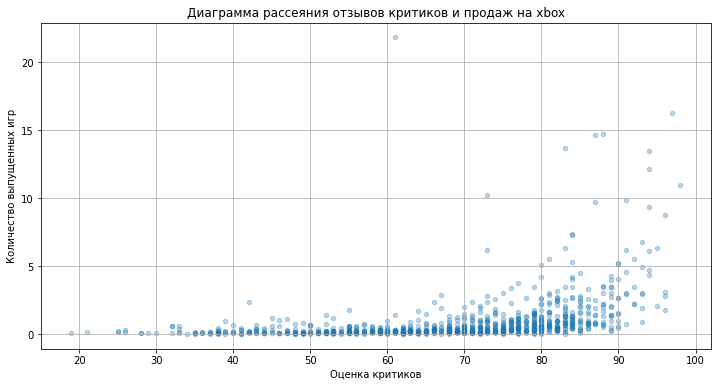

In [27]:
# Диаграмма рассеяния отзывов пользователей и продаж на xbox
xbox.plot(x='user_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка пользователей',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов пользователей и продаж на xbox',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

# Диаграмма рассеяния отзывов критиков и продаж на xbox
xbox.plot(x='critic_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка критиков',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов критиков и продаж на xbox',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

In [28]:
# Расчет корреляции отзывов пользователей и продаж на ps_3
ps_3 = data[data['platform']=='PS3']
print('Корреляция отзывов пользователей и продаж равна:', ps_3['user_score'].corr(ps_3['total_sales']), '\n')

# Расчет корреляции отзывов критиков и продаж на ps_3
ps_3 = data[data['platform']=='PS3']
print('Корреляция отзывов критиков и продаж равна:', ps_3['critic_score'].corr(ps_3['total_sales']))

Корреляция отзывов пользователей и продаж равна: 0.12841562938563006 

Корреляция отзывов критиков и продаж равна: 0.4327589578997135


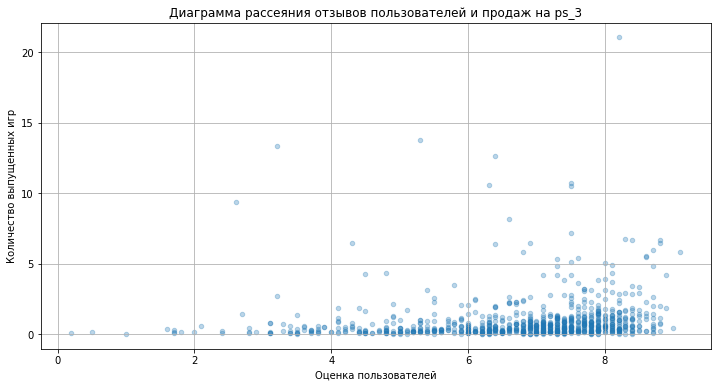

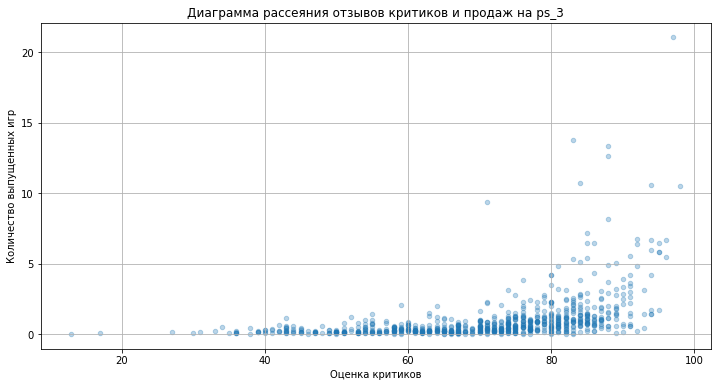

In [29]:
# Диаграмма рассеяния отзывов пользователей и продаж на ps_3
ps_3.plot(x='user_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка пользователей',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов пользователей и продаж на ps_3',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

# Диаграмма рассеяния отзывов критиков и продаж на ps_3
ps_3.plot(x='critic_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка критиков',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов критиков и продаж на ps_3',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

In [30]:
# Расчет корреляции отзывов пользователей и продаж на wii
wii = data[data['platform']=='Wii']
print('Корреляция отзывов пользователей и продаж равна:', wii['user_score'].corr(wii['total_sales']), '\n')

# Расчет корреляции отзывов критиков и продаж на wii
wii = data[data['platform']=='Wii']
print('Корреляция отзывов критиков и продаж равна:', wii['critic_score'].corr(wii['total_sales']))

Корреляция отзывов пользователей и продаж равна: 0.11283121360773772 

Корреляция отзывов критиков и продаж равна: 0.17790728577594908


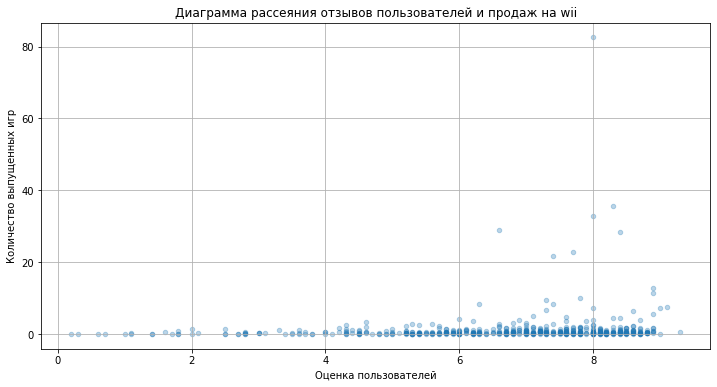

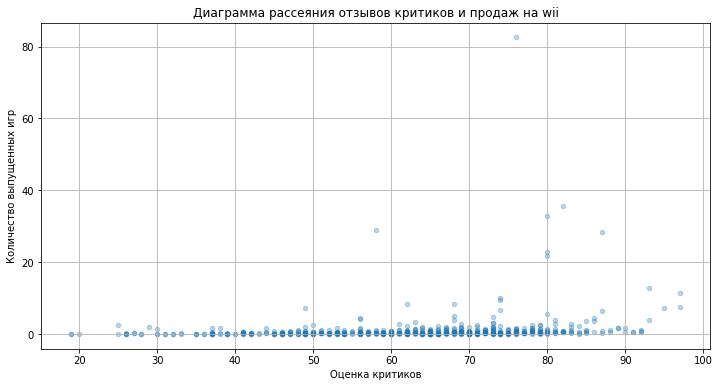

In [31]:
# Диаграмма рассеяния отзывов пользователей и продаж на wii
wii.plot(x='user_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка пользователей',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов пользователей и продаж на wii',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

# Диаграмма рассеяния отзывов критиков и продаж на wii
wii.plot(x='critic_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка критиков',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов критиков и продаж на wii',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

In [32]:
# Расчет корреляции отзывов пользователей и продаж на DS
ds = data[data['platform']=='DS']
print('Корреляция отзывов пользователей и продаж равна:', ds['user_score'].corr(ds['total_sales']), '\n')

# Расчет корреляции отзывов критиков и продаж на xbox
ds = data[data['platform']=='DS']
print('Корреляция отзывов критиков и продаж равна:', ds['critic_score'].corr(ds['total_sales']))

Корреляция отзывов пользователей и продаж равна: 0.13087600975844202 

Корреляция отзывов критиков и продаж равна: 0.23754579854113453


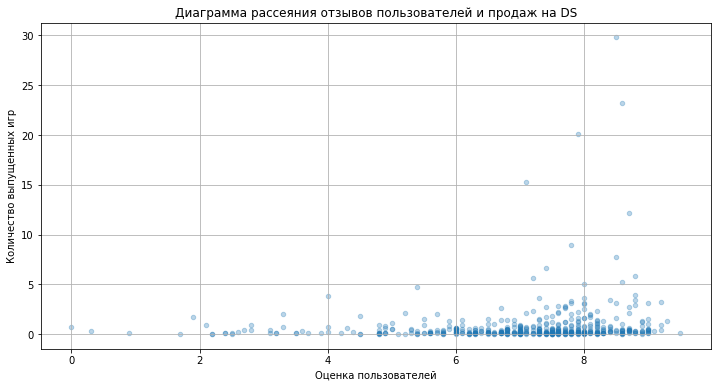

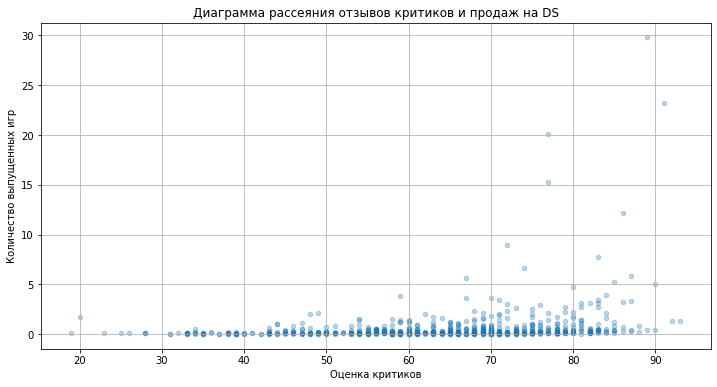

In [33]:
# Диаграмма рассеяния отзывов пользователей и продаж на 
ds.plot(x='user_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка пользователей',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов пользователей и продаж на DS',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

# Диаграмма рассеяния отзывов критиков и продаж на xbox
ds.plot(x='critic_score', 
          y='total_sales', 
          kind='scatter',
          xlabel='Оценка критиков',
          ylabel='Количество выпущенных игр',
          title='Диаграмма рассеяния отзывов критиков и продаж на DS',
          alpha=0.3,
          figsize=(12,6),
          grid=True)
plt.show()

**Вывод:** Практически у всех платформ присутствуюет корреляционная зависимость, между оценками продаж критиков и пользователей к продажам, при чем оценка пользователей в меньшей степени влияет на продажи, нежели оценки критиков, следовательно можно сделать вывод, что покупатели больше всего прислушиваются к оценкам критиков, а не пользователей. 

Теперь определим общее распределение игр по жанрам. Рассмотрим выделяются ли жанры с высокими и низким продажами

In [34]:
# Выведем таблицы жанры и продажи в период с 2015 по 2016 год и сохраним их profitable_genres
profitable_genres = (
   data_actual.pivot_table(index='genre', values='total_sales', aggfunc='mean')
    .sort_values(by='total_sales', ascending=False)
)
profitable_genres = profitable_genres.reset_index().rename_axis(None, axis=1)
profitable_genres

,genre,total_sales
0,Shooter,1.305309
1,Sports,0.601215
2,Role-Playing,0.422879
3,Fighting,0.334324
4,Platform,0.331429
5,Racing,0.258571
6,Action,0.236961
7,Simulation,0.228788
8,Misc,0.199577
9,Adventure,0.108909


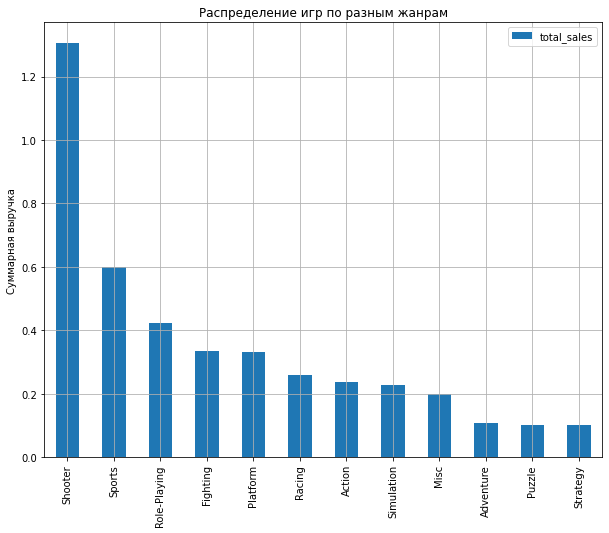

In [35]:
# Построим график распределения игр по продажам
( 
    profitable_genres.plot(grid=True,
                           x='genre', 
                           y='total_sales',
                           kind='bar',
                           xlabel='',
                           ylabel='Суммарная выручка',
                           title='Распределение игр по разным жанрам',
                           figsize=(10,8))
);

**Вывод:** Исходя из графика, можно заметить, что в период с 2015 год лучше всего продаются игры в жанре шутер, также в топ 3 игр входят спортивные, ролевые и игры в жанре борьбы. Меньше всего популярность имеют игры в жанре стратигии.

### Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
1) Самые популярные платформы (топ-5). Опишим различия в долях продаж.

2) Самые популярные жанры (топ-5).

3) Влияют ли рейтинг ESRB на продажи в отдельном регионе.

#### Топ-5 платформ в Северной Америке (NA)

Выведем рейтинги за всё время: 

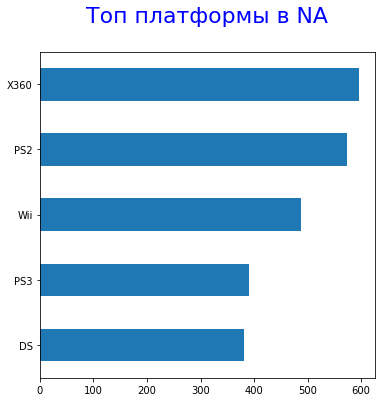

In [36]:
# Определение популярных платформ
(
    data.groupby('platform')['na_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ платформы в NA' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

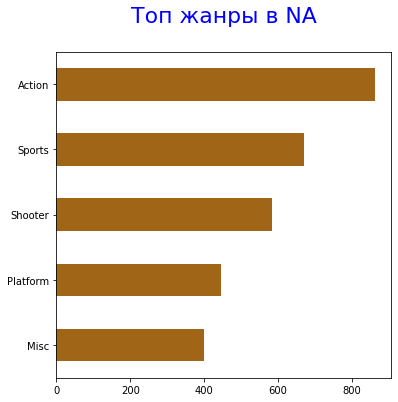

In [37]:
# Определение популярных жанров
(
    data.groupby('genre')['na_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ жанры в NA' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

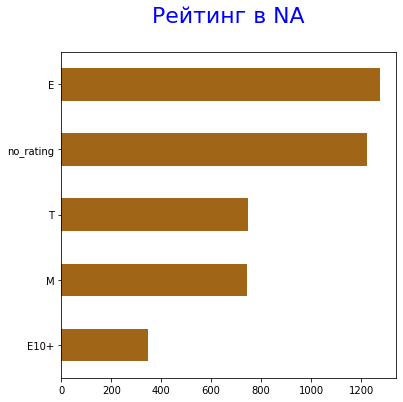

In [38]:
# Определение рейтинга популярных игр
(
    data.groupby('rating')['na_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Рейтинг в NA' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

Теперь выведем рейтинги за последний год:

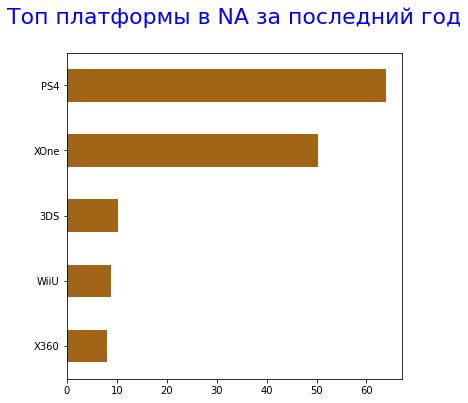

In [39]:
(
    data_actual.groupby('platform')['na_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ платформы в NA за последний год' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BuGn_r')
plt.show()

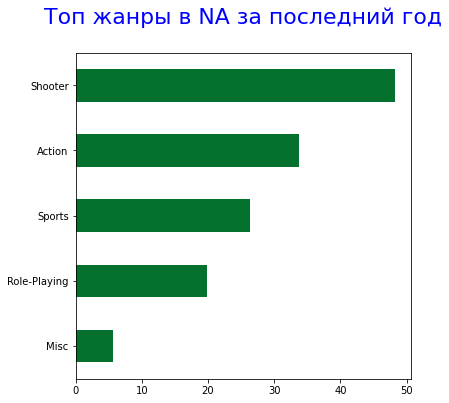

In [40]:
# Определение популярных жанров за последний год
(
    data_actual.groupby('genre')['na_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ жанры в NA за последний год' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BuGn_r')
plt.show()

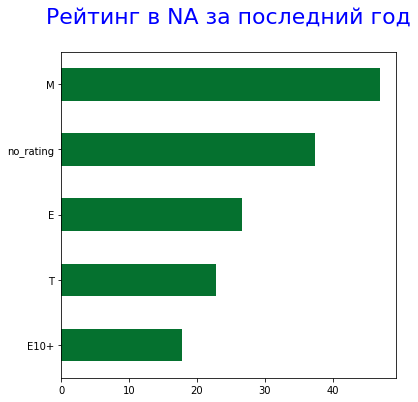

In [41]:
# Определение рейтинга популярных игр за последний год
(
     data_actual.groupby('rating')['na_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Рейтинг в NA за последний год' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BuGn_r')
plt.show()

**Вывод:** 
* Самые популярные платформы в Северной Америке за все время: X360, PS2, Wii, PS3, DS.
* Самыми популярными жанрами на этом континенте являются: Action, Sports, Shooter, Platform, Misc
* По рейтингу видно, что больше всего продаж за все время у игр с рейтингом Е (для всех), затем игры с неопределенным рейтингом и рейтингом T (для детей от 13 лет).

При этом если посмотреть данные за последний год, то можно замететить некоторые изменения, а именно:
* Топ популярных платформ: PS4, Xone, DS3, WiiU, PC
* Топ жанров игр: Shooter, Action, Sports
* Рейтинг игр: M (От 17 и выше) , T (от 13 и выше) и игры с неопределенным рейтингом

#### Топ-5 платформ в Европе (EU)

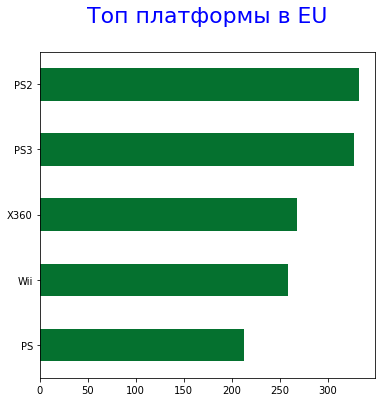

In [42]:
# Определение популярных платформ
(
    data.groupby('platform')['eu_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ платформы в EU' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

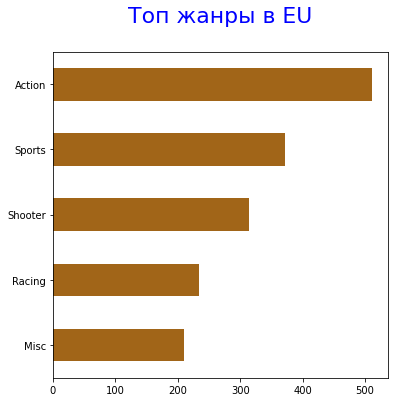

In [43]:
# Определение популярных жанров
(
    data.groupby('genre')['eu_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ жанры в EU' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

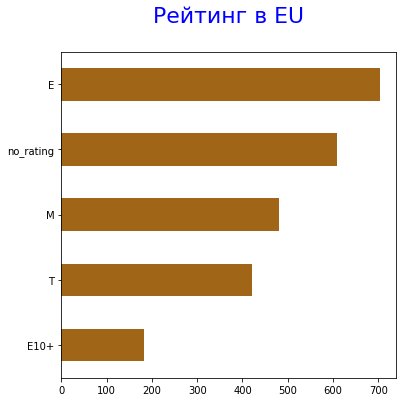

In [44]:
# Определение рейтинга популярных игр
(
    data.groupby('rating')['eu_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Рейтинг в EU' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

Определяем рейтинг по последним годам в Европе:

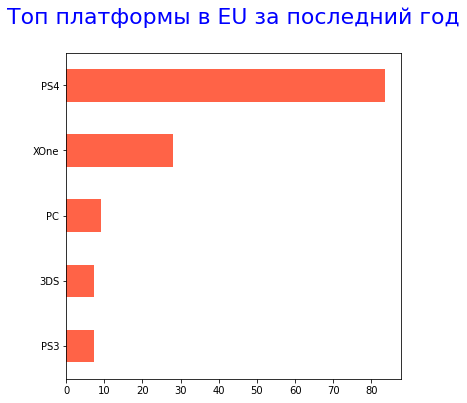

In [62]:
(
    data_actual.groupby('platform')['eu_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot(kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='',
           color='tomato')
    .set_title('Топ платформы в EU за последний год' + "\n", fontsize = 22, color = 'Blue')
);
plt.show()

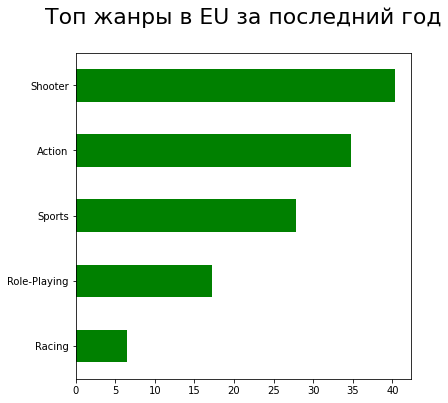

In [64]:
# Определение популярных жанров за последний год
(
    data_actual.groupby('genre')['eu_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='',
           color = 'green')
    .set_title('Топ жанры в EU за последний год' + "\n", fontsize = 22)
);
plt.show()

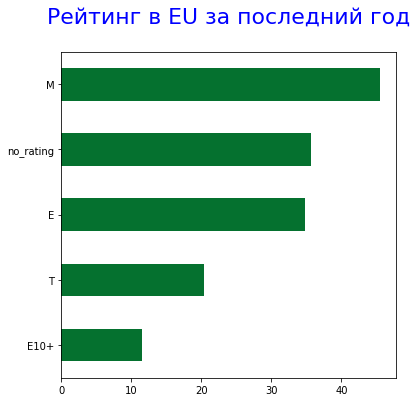

In [146]:
# Определение рейтинга популярных игр за последний год
(
     data_actual.groupby('rating')['eu_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Рейтинг в EU за последний год' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BuGn_r')
plt.show()

**Вывод:** 
* Самые популярные платформы в Европе за все время: PS2, PS3, X360, Wii, PS.
* Самыми популярными жанрами на этом континенте являются: Action, Sports, Shooter, Racing, Misc
* По рейтингу видно, что больше всего продаж за все время у игр с рейтингом M (От 17 и выше), затем игры с неопределенным рейтингом, после с рейтингом Е (для всех).

Изменение данных за последний год:
* Топ популярных платформ: PS4, Xone, PC, 3DS, WiiU
* Топ жанров игр: Shooter, Sports, Action, Role-Playing, Racing
* Рейтинг игр: M (От 17 и выше) , E (для всех) и T (от 13 и выше) 

#### Топ-5 платформ в Японии (JP)

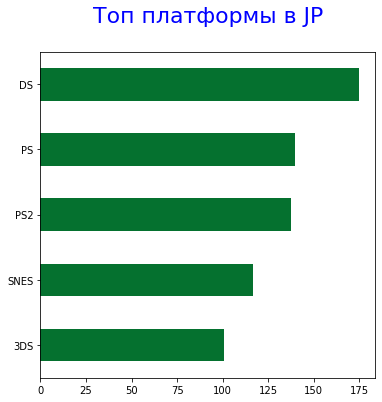

In [147]:
# Определение популярных платформ
(
    data.groupby('platform')['jp_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ платформы в JP' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

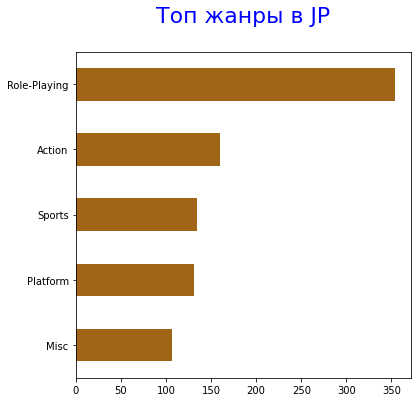

In [148]:
# Определение популярных жанров
(
    data.groupby('genre')['jp_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ жанры в JP' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

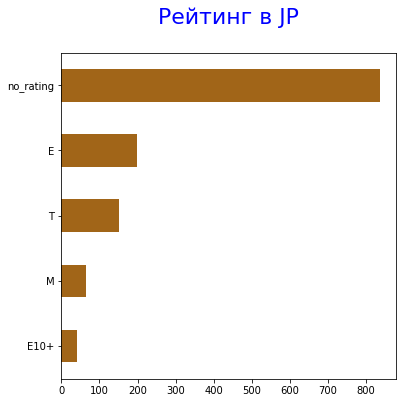

In [149]:
# Определение рейтинга популярных игр
(
    data.groupby('rating')['jp_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Рейтинг в JP' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BrBG')
plt.show()

Теперь выведем рейтинги за последний год

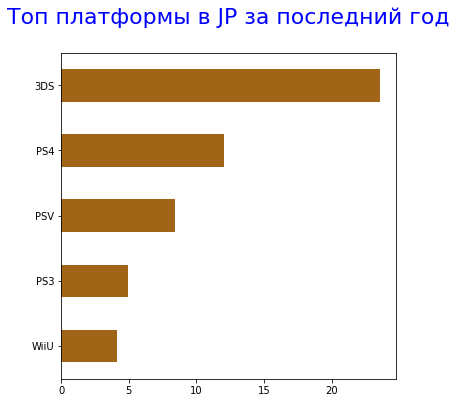

In [150]:
(
    data_actual.groupby('platform')['jp_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ платформы в JP за последний год' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BuGn_r')
plt.show()

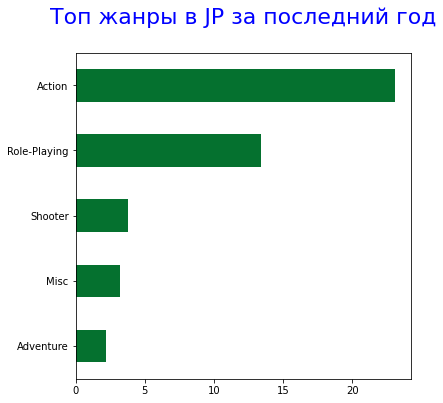

In [151]:
# Определение популярных жанров за последний год
(
    data_actual.groupby('genre')['jp_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Топ жанры в JP за последний год' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BuGn_r')
plt.show()

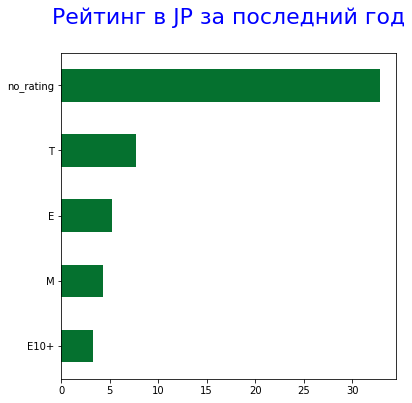

In [152]:
# Определение рейтинга популярных игр за последний год
(
     data_actual.groupby('rating')['jp_sales']
    .sum().sort_values(ascending=True)
    .tail(5)
    .plot (kind= 'barh', 
           figsize=(6,6), 
           legend = False, 
           fontsize = 10, 
           xlabel='')
    .set_title('Рейтинг в JP за последний год' + "\n", fontsize = 22, color = 'Blue')
);
sns.set_palette('BuGn_r')
plt.show()

**Вывод:** 
* Самые популярные платформы в Японии за все время: DS, PS, PS2, SNES, 3DS.
* Самыми популярными жанрами на этом континенте являются: Role-Playing, Action, Sports, Platform, Misc 
* По рейтингу видно, что больше всего продаж за все время у игр с неопределенным рейтингом, затем игры с рейтингом Е (для всех),  после с рейтингом T (для детей от 13 лет).

Изменение данных за последний год:
* Топ популярных платформ: 3DS, PS4, PSV, PS3, WiiU
* Топ жанров игр: Action, Role-Playing, Adventure, Shooter, Misc
* Рейтинг игр: игры с неопределенным рейтингом,  T (от 13 и выше), M (От 17 и выше). 

**Общий вывод:**

*В результате анализа получились следующие данные по популярности платформ:*
* В Северной Америке: BOX, PS2, WII, PS3, DS.
* В Европе: PS2, PS3, XBOX, WII, PS.
* В Японии:  DS, PS, PS2, SNES, 3DS.

*Самые популярные жанры:*
* В Северной Америке: Action, Sports, Shooter, Platform, Misc.
* В Европе: Action, Sports, Shooter, Racing, Misc.
* В Японии:  Role-Playing, Action, Sports, Platform, Misc.

*Рейтинг игр:*
* В Северной Америке: Е (для всех), неопределенным рейтинг, T (для детей от 13 лет).
* В Европе: M (От 17 и выше), неопределенный рейтинг, Е (для всех).
* В Японии: неопределенный рейтинг, Е (для всех), T (для детей от 13 лет).

***Если брать данные за последний год, то***:

*Данные по популярности платформы имеют следующие значения:*
* В Северной Америке: PS4, Xone, DS3, WiiU, PC.
* В Европе: PS4, Xone, PC, 3DS, WiiU.
* В Японии: 3DS, PS4, PSV, PS3, WiiU

*Популярные жанры за последний год:*
* В Северной Америке: Shooter, Action, Sports, Role-Playing
* В Европе: Shooter, Sports, Action, Role-Playing, Racing
* В Японии: Action, Role-Playing, Adventure, Shooter, Misc 

*Рейтинг игр за последний год:*
* В Северной Америке: M (От 17 и выше) , T (от 13 и выше) и неопределенный рейтинг
* В Европе: M (От 17 и выше) , E (для всех) и T (от 13 и выше)
* В Японии: Рейтинг игр: неопределенный рейтинг, T (от 13 и выше) и M (От 17 и выше).

Таким образом полученные данные показывают, что в 2017 году, вероятно, большую часть прибыли ещё смогут приносить игры жанра Shooter, для платформы PS4 и возможно Xone. Но нельзя быть уверенным, что эти платформы не провалются в дальнейшем, так как технологии не стоят на месте и меняются очень быстрыми темпами, и вкусы людей также могут меняться, как правило быстро.

### Проверка гипотиз

1) Проверим гипотезы о том, являются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковыми;

2) Также проверим являются ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разными.

Сформулируем гипотезу по перовому пунтку:

H₀: Пользовательские рейтинги платформ Xbox One и PC одинаковы

H₁: Пользовательские рейтинги платформ Xbox One и PC различаются

In [162]:
# Сохраним в переменной hypothesis_xone данные за 2 года
hypothesis_xone = data_actual[data_actual['platform']=='XOne']
hypothesis_xone = hypothesis_xone['user_score']
# Сохраним в переменной hypothesis_pc данные за 2 года
hypothesis_pc = data_actual[data_actual['platform']=='PC']
hypothesis_pc = hypothesis_pc['user_score']
# Посчитаем средний рейтинг пользователя для xbox платформ
print('Средний рейтинг пользователя для Xbox:', hypothesis_xone.mean())

# Посчитаем средний рейтинг пользователя для PC платформ
print('Средний рейтинг пользователя для PC:', hypothesis_pc.mean())

Средний рейтинг пользователя для Xbox: 6.542148760330578
Средний рейтинг пользователя для PC: 6.296428571428573


In [163]:
# Вызовем метод st.ttest_ind для проверки гипотезы
alpha = .01
results = st.ttest_ind(hypothesis_xone, hypothesis_pc, equal_var=False, nan_policy='omit')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.2946308864003399
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Значение p-value равно примерно 3%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 3% можно получить различность рейтингов двух платформ

Сформулируем гипотезу по второму пунтку:

H₀: редние пользовательские рейтинги жанров Action и Sports одинаковы

H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [164]:
# Сохраним в переменной hypothesis_xone данные за 2 года
hypothesis_action = data_actual[data_actual['genre']=='Action']
hypothesis_action = hypothesis_action['user_score']

# Сохраним в переменной hypothesis_pc данные за 2 года
hypothesis_sports = data[data['genre']=='Sports']
hypothesis_sports = hypothesis_sports['user_score']

# Посчитаем среднюю оценку пользователей по жанру экшен
print('Средняя оценка пользователя для по жанру экшен:', hypothesis_action.mean())

# Посчитаем среднюю оценку пользователей по жанру спорт
print('Средняя оценка пользователя для по жанру спорт:', hypothesis_sports.mean())

Средняя оценка пользователя для по жанру экшен: 6.808290155440415
Средняя оценка пользователя для по жанру спорт: 6.951433857539316


In [165]:
# Вызовем метод st.ttest_ind для проверки гипотезы
alpha = .01
results = st.ttest_ind(hypothesis_action, hypothesis_sports, equal_var=False, nan_policy='omit')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.18897723863282748
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Значение p-value равно примерно 2%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 2% можно получить различность рейтингов двух жанров

### Общий вывод

* Перед началом проведения анализа, все столбцы датасета были приведены к правильным типам данных, также они были приадены к нижнему регистру.
* Также было определено, что аббревиатура tbd означает to be determined, to be done. То есть данные были специально заполнены этой аббревиатурой, поэтому она была заменина на nan для проведения дальнейшего анализа
* Проведя анализ, было выявлено, что количество игр на игровых приставках и компьютерах начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как вышел первый сенсорный телефон и массово начали создаваться мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр
* За весь период консольных приставок самыми популярными из них оказались: PS2, X360, PS3, WII, DS, PS.
* Также было выявлено, что средняя продолжительность жизни игровой приставки в среднем составляет около 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли
* Исходя из стоит отметить, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего отсутствием интереса людей к приставке либо её высокой ценой и плохим качеством
* Проведя анализ оценок пользователей и критиков было выявлено, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
* Так же было определено, что самый популярный жанр за все время это Экшн. На последнем месте стратегии

* После анализа оценок был составлен портреты пользователей каждого региона.
* Так в Северной Америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами:  "для всех", "с неопределенным рейтингом", и "для детей от 13 лет".
* В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр в Европе следующий: "От 17 и выше", "неопределенный рейтинг", "для всех".
* В Японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр:  "неопределенный рейтинг", "для всех", "для детей от 13 лет".

Исходя из всего перечисленного можно предположить, что лучше всего продавать игры для таких приставок как Sony Playstation 4
Если выбрать жанр Shooter и выбирать игры с рейтингом "от 17 и выше", то тогда продажи будут высокие, в отличие от других жанров игр.